# Texture Feature Extraction : Temporal Analysis for Evolution of Web Design 

This ipython is to demonstrate and extract the texture feature. I am using multi texton histogram approach for detection of the texture. MTH intregate the advantage of co-occurence matrix using histogram and can be considered as generalized visual descriptor. 

I will be using color space texture so that I wont lose color based texture boundary.

In [1]:
import numpy as np
import pandas as pd
import cv2
import os

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('E://Study//CV//images-227//')#Image dir

## Multi texton Histogram 

Proposed algorithm can be broken down in following part :

* Textutre orientation detection
* Color Quantization in RGB
* Texton Detection
* Multi texton Histogram

<img src="texton img.jpg"/>

## Texture Oriention detection

In [361]:
import math

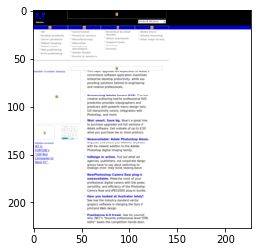

In [382]:
img = cv2.imread("adobe.com/20030419143530.png")
plt.imshow(img)

In [363]:
def get_texture_orientation_v2(image,ksize = 3):
    #get Sobel
    red_ = image[:,:,2]
    green_ = image[:,:,1]
    blue_ = image[:,:,0]
    sobel_Rx = cv2.Sobel(red_,cv2.CV_64F,1,0,ksize=ksize)
    sobel_Ry = cv2.Sobel(red_,cv2.CV_64F,0,1,ksize=ksize)
    sobel_Gx = cv2.Sobel(green_,cv2.CV_64F,1,0,ksize=ksize)
    sobel_Gy = cv2.Sobel(green_,cv2.CV_64F,0,1,ksize=ksize)
    sobel_Bx = cv2.Sobel(blue_,cv2.CV_64F,1,0,ksize=ksize)
    sobel_By = cv2.Sobel(blue_,cv2.CV_64F,0,1,ksize=ksize)
    gxx = np.sqrt(np.square(sobel_Rx) + np.square(sobel_Gx) + np.square(sobel_Bx))
    gyy = np.sqrt(np.square(sobel_Ry) + np.square(sobel_Gy) + np.square(sobel_By))
    gxy = (sobel_Ry * sobel_Rx + sobel_Gy * sobel_Gx + sobel_By * sobel_Bx)
    thetha =  ((gxy / (gxx * gyy + 0.0001))) # adding 0.00001 for numerical stability
    #print(thetha[np.where(thetha>1)])
    #return thetha
    for i in range(thetha.shape[0]):
        for j in range(thetha.shape[1]):
            theta[i,j] = (math.acos(theta[i,j]) *180/math.pi)
    return(theta)
    

In [399]:
def get_orientation(img,quantize_degree = 18):
    """
    Source : polyu.edu.hk
    arr: Image
    quantize_degree: orientation 
    """
    arr = img
    width,height = arr.shape[0],arr.shape[1]
    gxx = gyy = gxy = 0.0
    rh = gh = bh = 0.0
    rv = gv = bv = 0.0
    theta = np.zeros((width,height))
    ori = np.zeros((width,height))
    for i in range(1, width-2):
        for j in range(1, height-2):
            #Sobel Operator
            rh=arr[i-1,j+1,0] + 2 * arr[i,j + 1,0] + arr[i+1, j+1,0] - (arr[i-1, j - 1, 0] + 2 * arr[i,j-1, 0] + arr[i + 1, j - 1, 0])
            gh=arr[i-1,j+1,1] + 2 * arr[i,j + 1,1] + arr[i+ 1,j+1,1] - (arr[i-1, j - 1, 1] + 2 * arr[i,j-1, 1] + arr[i + 1, j - 1, 1])
            bh=arr[i-1,j+1,2] + 2 * arr[i,j + 1,2] + arr[i+ 1,j+1,2] - (arr[i-1, j - 1, 2] + 2 * arr[i,j-1, 2] + arr[i + 1, j - 1, 2])

            rv=arr[i+1,j-1,0] + 2 * arr[i+1, j, 0] + arr[i+ 1,j+1,0] - (arr[i-1, j - 1, 0] + 2 * arr[i-1,j, 0] + arr[i - 1, j + 1, 0])
            gv=arr[i+1,j-1,1] + 2 * arr[i+1, j, 1] + arr[i+ 1,j+1,1] - (arr[i-1, j - 1, 1] + 2 * arr[i-1,j, 1] + arr[i - 1, j + 1, 1])
            bv=arr[i+1,j-1,2] + 2 * arr[i+1, j, 2] + arr[i+ 1,j+1,2] - (arr[i-1, j - 1, 2] + 2 * arr[i-1,j, 2] + arr[i - 1, j + 1, 2])

            gxx = math.sqrt(rh * rh + gh * gh + bh * bh)
            gyy = math.sqrt(rv * rv + gv * gv + bv * bv)
            
            gxy = rh * rv + gh * gv + bh * bv

            theta[i,j] = math.acos((gxy / (gxx * gyy + 0.0001))) * 180/math.pi
            #Quantize
    for i in range(0,width):
        for j in range(0, height):
            ori[i,j] = round(theta[i,j]*quantize_degree/180)
            if(ori[i,j]>=quantize_degree-1):
                ori[i,j] = quantize_degree-1
    return ori

In [389]:
ori = get_orientation(img)

In [379]:
def quantize_(channel):
    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            if channel[i,j] >=0 and channel[i,j]<=64:
                channel[i,j] = 0
            if channel[i,j] >=65 and channel[i,j]<=128:
                channel[i,j] = 1
            if channel[i,j] >=129 and channel[i,j]<=192:
                channel[i,j] = 2
            if channel[i,j] >=193 and channel[i,j]<=255:
                channel[i,j] = 3
    return channel

In [380]:
def get_colorQuantization(img):
    img_quan = np.zeros((img.shape[0],img.shape[1]))
    red_ = img[:,:,2]
    green_ = img[:,:,1]
    blue_ = img[:,:,0]
    red_q = quantize_(red_)
    green_q = quantize_(green_)
    blue_q = quantize_(blue_)
    img_quan = 16 * red_q + 4 * green_q + blue_q
    return img_quan

In [385]:
imag_quantize = get_colorQuantization(img)

## Texton Detection 

In [384]:
def detect_texton(img_quantized):
    """
    Four texton detection
    """
    Texton = np.zeros_like(img_quantized)
    width,height = img_quantized.shape[0],img_quantized.shape[1]
    for i in range(0,(int)(width/2)):
        for j in range(0,(int)(height/2)):
            #Texton T1
            if(img_quantized[2*i,2*j] == img_quantized[2*i+1,2*j+1]):
                Texton[2 * i, 2 * j] = img_quantized[2 * i, 2 * j];
                Texton[2 * i + 1, 2 * j] = img_quantized[2 * i + 1, 2 * j];
                Texton[2 * i, 2 * j + 1] = img_quantized[2 * i, 2 * j + 1];
                Texton[2 * i + 1, 2 * j + 1] = img_quantized[2 * i + 1, 2 * j + 1];
            #Texton T2
            if (img_quantized[2*i,2*j+1] == img_quantized[2*i+1,2*j]):
                Texton[2 * i, 2 * j] = img_quantized[2 * i, 2 * j];
                Texton[2 * i + 1, 2 * j] = img_quantized[2 * i + 1, 2 * j];
                Texton[2 * i, 2 * j + 1] = img_quantized[2 * i, 2 * j + 1];
                Texton[2 * i + 1, 2 * j + 1] = img_quantized[2 * i + 1, 2 * j + 1];
            #Texton T3
            if (img_quantized[2*i,2*j] == img_quantized[2*i+1,2*j]): 
                Texton[2 * i, 2 * j] = img_quantized[2 * i, 2 * j];
                Texton[2 * i + 1, 2 * j] = img_quantized[2 * i + 1, 2 * j];
                Texton[2 * i, 2 * j + 1] = img_quantized[2 * i, 2 * j + 1];
                Texton[2 * i + 1, 2 * j + 1] = img_quantized[2 * i + 1, 2 * j + 1];
            #Texton T4
            if (img_quantized[2*i,2*j] == img_quantized[2*i,2*j+1]):
                Texton[2 * i, 2 * j] = img_quantized[2 * i, 2 * j];
                Texton[2 * i + 1, 2 * j] = img_quantized[2 * i + 1, 2 * j];
                Texton[2 * i, 2 * j + 1] = img_quantized[2 * i, 2 * j + 1];
                Texton[2 * i + 1, 2 * j + 1] = img_quantized[2 * i + 1, 2 * j + 1];
    return Texton

In [388]:
texton_image = detect_texton(imag_quantize)

In [393]:
def get_MLT_histogram(texton_image,ori,quantize_degree=18,color_quantization = 64):
    bin_size = quantize_degree + color_quantization
    MTH = np.zeros(bin_size)
    MatrixH = np.zeros(bin_size)
    MatrixV = np.zeros(bin_size)
    MatrixRD = np.zeros(bin_size)
    MatrixLD = np.zeros(bin_size)
    width,height = texton_image.shape[0], texton_image.shape[1]
    D = 1 #distance parameter

    for i in range(0, width):
        for j in range(0, height-D):
            if(ori[i, j+D] == ori[i, j]):
                MatrixH[(int)(texton_image[i,j])] += 1;
            if(texton_image[i, j + D] == texton_image[i, j]):
                MatrixH[(int)(color_quantization + ori[i, j])] += 1;

    for i in range(0, width-D):
        for j in range(0, height):
            if(ori[i + D, j] == ori[i, j]):
                MatrixV[(int)(texton_image[i,j])] += 1;
            if(texton_image[i + D, j] == texton_image[i, j]):
                MatrixV[(int)(color_quantization + ori[i, j])] += 1;

    for i in range(0, width-D):
        for j in range(0, height-D):
            if(ori[i + D, j + D] == ori[i, j]):
                MatrixRD[(int)(texton_image[i,j])] += 1;
            if(texton_image[i + D, j + D] == texton_image[i, j]):
                MatrixRD[(int)(color_quantization + ori[i, j])] += 1;

    for i in range(D, width):
        for j in range(0, height-D):
            if(ori[i - D, j + D] == ori[i, j]):
                MatrixLD[(int)(texton_image[i,j])] += 1;
            if(texton_image[i - D, j + D] == texton_image[i, j]):
                MatrixLD[(int)(color_quantization + ori[i, j])] += 1;
    #Final return
    for i in range(0,bin_size):
        MTH[i] = MatrixH[i]+MatrixV[i] + MatrixRD[i] + MatrixLD[i]
    return MTH

In [395]:
def get_feature(image,quantize_degree=18,color_quantization = 64):
    #Orientation Quantization
    ori = get_orientation(img)
    #Color Quantization
    imag_quantize = get_colorQuantization(img)
    #get texton image
    texton_image = detect_texton(imag_quantize)
    #Get Histogram
    hst = get_MLT_histogram(texton_image,ori=ori,quantize_degree=18,color_quantization = 64)  
    return hst

In [408]:
img = cv2.imread('2712.jpg')

In [412]:
hst = get_feature(img)

<Container object of 82 artists>

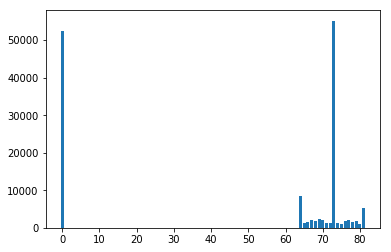

In [417]:
plt.bar(np.arange(82),hst)